In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.Outcome.nunique()

2

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
y = df.Outcome

In [7]:
X = df.drop(['Outcome'], axis = 1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [9]:
len(X_train)

690

In [10]:
len(X_test)

77

In [11]:
from sklearn.svm import SVC

In [12]:
model = SVC()

In [13]:
model.fit(X_train,y_train)

SVC()

In [14]:
model.score(X_test,y_test)

0.7402597402597403

In [15]:
y_pred = model.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
cm = confusion_matrix(y_test, y_pred)

In [18]:
import seaborn as sns

<Axes: >

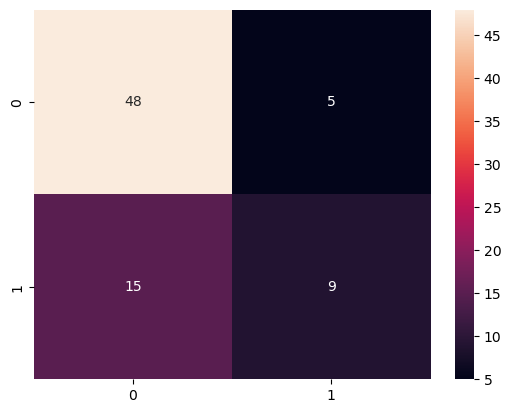

In [19]:
sns.heatmap(cm, annot = True)

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

In [22]:
df1 = scaler.fit_transform(df)

In [23]:
df1 = pd.DataFrame(df1, columns=df.columns)

In [24]:
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
762,0.529412,0.447236,0.508197,0.000000,0.000000,0.335320,0.027327,0.200000,0.0
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.0


In [25]:
y = df1.Outcome

In [26]:
X = df1.drop(['Outcome'], axis = 1)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
model = DecisionTreeClassifier()

In [30]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
model.score(X_test, y_test)

0.7012987012987013

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score

In [103]:
roc_auc = roc_auc_score(y_test, y_pred)

In [104]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

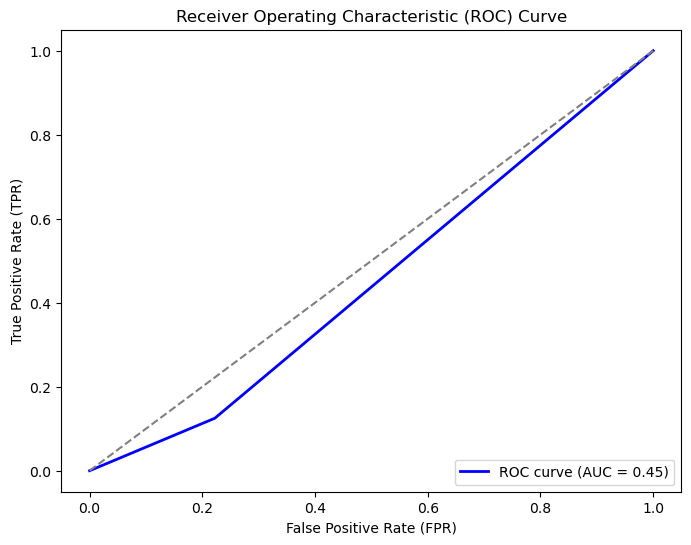

In [105]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

Text(0.5, 1.0, 'Correlation Matrix')

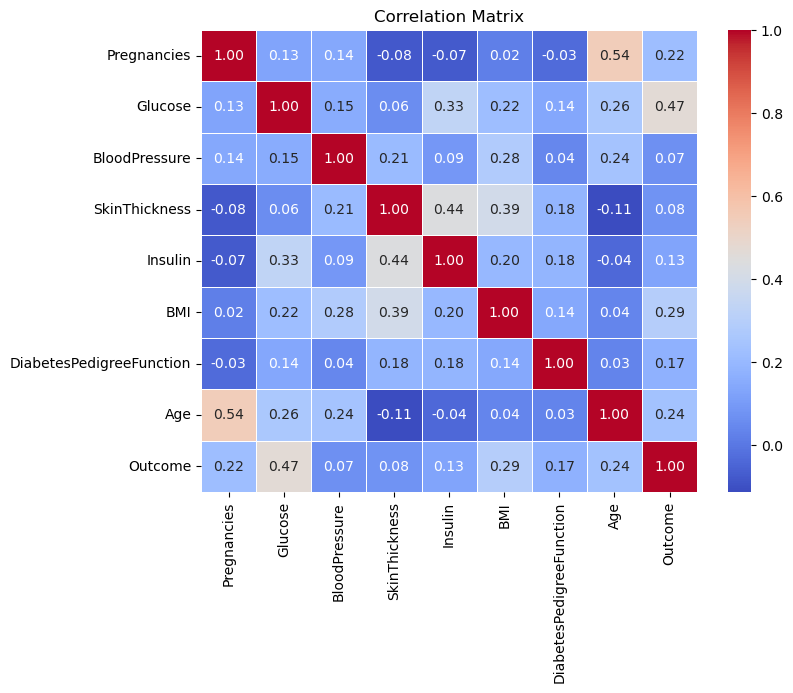

In [36]:
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
model = KNeighborsClassifier(n_neighbors=3)

In [39]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
model.score(X_test,y_test)

0.6883116883116883

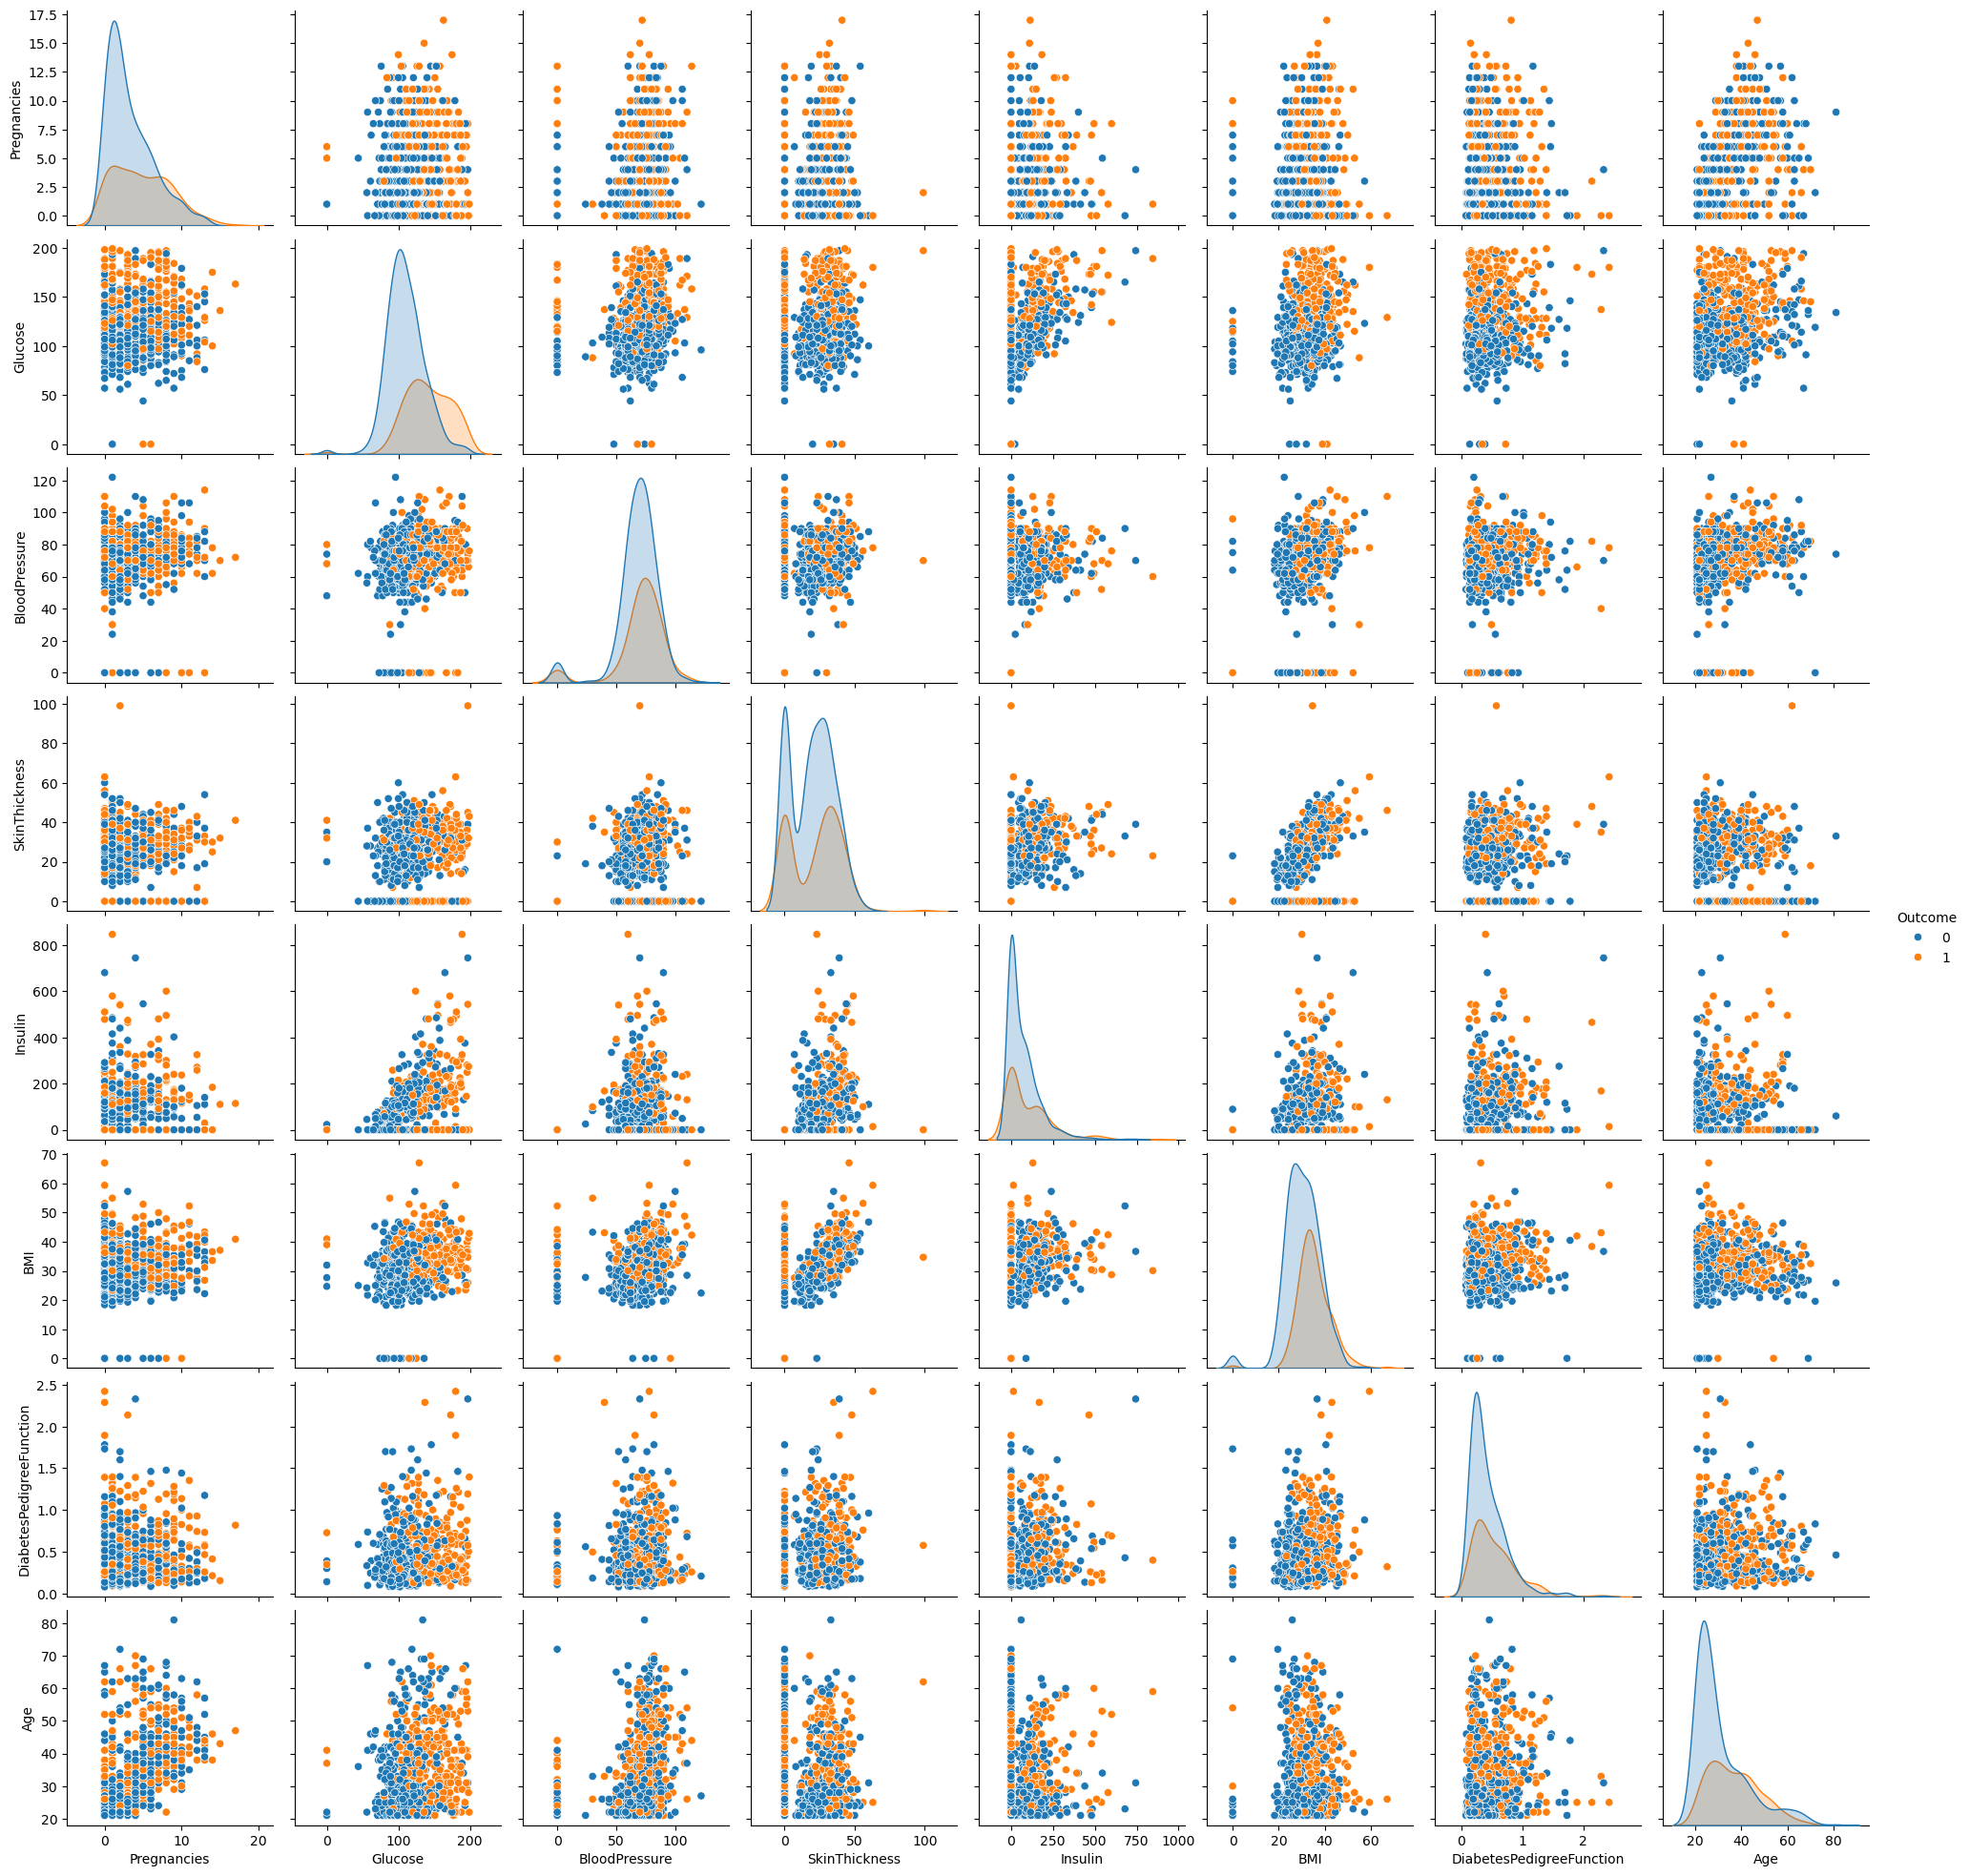

In [42]:
sns.pairplot(df, hue='Outcome')
plt.show()

In [43]:
from sklearn.datasets import load_iris

In [44]:
iris = load_iris()

In [45]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [53]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [54]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [55]:
df['target'] = iris.target

In [56]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


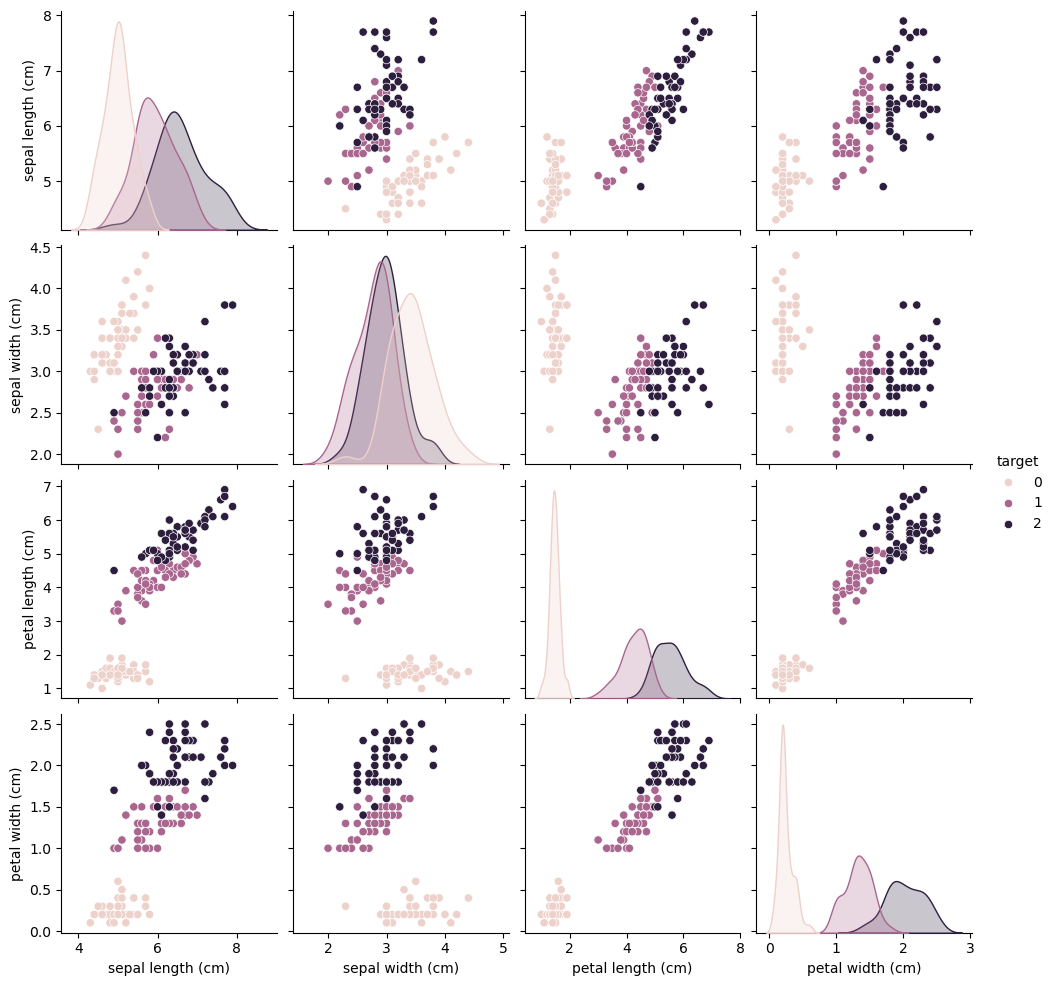

In [57]:
sns.pairplot(df,hue='target')

<Axes: >

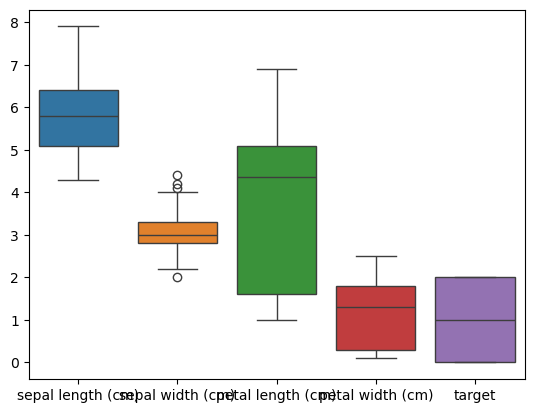

In [58]:
sns.boxplot(data=df)

In [63]:
z_scores = (df - df.mean()) / df.std()

In [84]:
threshold = 3

In [89]:
import numpy as np
outliers = np.abs(z_scores) > threshold

In [90]:
outliers.sum()

sepal length (cm)    0
sepal width (cm)     1
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [99]:
cleaned_df = df[(np.abs(z_scores) <= threshold).all(axis=1)]

In [100]:
print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", cleaned_df.shape)

Original DataFrame shape: (150, 5)
Cleaned DataFrame shape: (149, 5)


In [101]:
z_scores

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.897674,1.015602,-1.335752,-1.311052,-1.220656
1,-1.139200,-0.131539,-1.335752,-1.311052,-1.220656
2,-1.380727,0.327318,-1.392399,-1.311052,-1.220656
3,-1.501490,0.097889,-1.279104,-1.311052,-1.220656
4,-1.018437,1.245030,-1.335752,-1.311052,-1.220656
...,...,...,...,...,...
145,1.034539,-0.131539,0.816859,1.443994,1.220656
146,0.551486,-1.278680,0.703564,0.919223,1.220656
147,0.793012,-0.131539,0.816859,1.050416,1.220656
148,0.430722,0.786174,0.930154,1.443994,1.220656


<Axes: >

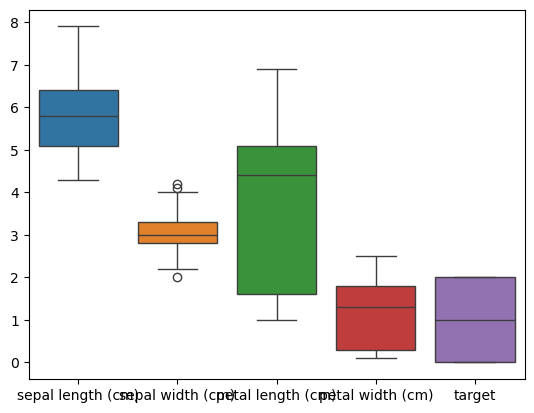

In [102]:
sns.boxplot(data=df_cleaned)

In [106]:
df_cleaned

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [107]:
X = df_cleaned.drop(['target'],axis=1)

In [108]:
y = df_cleaned.target

In [109]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [114]:
len(X_train)

134

In [115]:
len(X_test)

15

In [116]:
from sklearn.neighbors import KNeighborsClassifier

In [117]:
model = KNeighborsClassifier()

In [118]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [119]:
model.score(X_test,y_test)

1.0

In [134]:
df0 = df_cleaned[(df_cleaned['target']==0) | (df_cleaned['target'] == 1)]

In [135]:
X = df0.drop(['target'],axis=1)

In [136]:
y = df0.target

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [138]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

1.0

In [139]:
from sklearn.metrics import roc_curve, roc_auc_score

In [140]:
y_pred = model.predict(X_test)

In [141]:
fpr, tpr, threshold = roc_curve(y_test,y_pred)

In [142]:
score = roc_auc_score(y_test,y_pred)

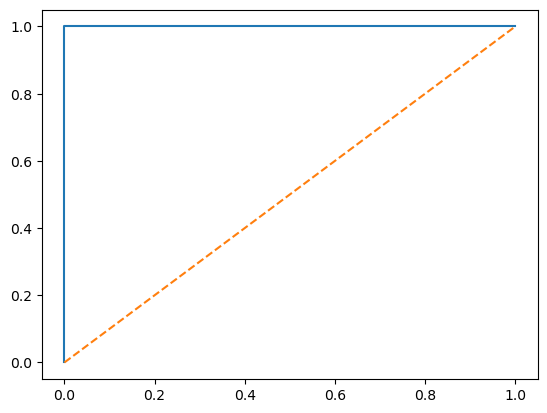

In [145]:
plt.plot(fpr,tpr)
plt.plot([0,1], linestyle='--')

In [147]:
from sklearn.metrics import r2_score, fbeta_score, mean_squared_error

In [148]:
mean_squared_error(y_test,y_pred)

0.0

In [149]:
fbeta_score(y_test,y_pred,beta=2)

1.0

In [150]:
r2_score(y_test,y_pred)

1.0

In [153]:
threshold

array([2, 1, 0])

In [ ]:
from sklearn.preprocessing import MinMaxScaler